In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
from matplotlib.patches import Rectangle

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
df_list = [] #empty list to hold all the dataframes

In [3]:
n_measurements = 20 #no. of different values used
max_gRate = 0.083
immigration_rate = 20.
K = 550
#when deterioration greater than this value we change from immigration dominated to deterioration dominated
phase2_lim = immigration_rate/K 
phase2_lim_scaled = phase2_lim/max_gRate

N_thresh_min = 0.45 #range of values for N*
N_thresh_max = 0.95
delta_N_thresh = (N_thresh_max - N_thresh_min)/n_measurements

det_ratio_min = 0.1 #range of values for deterioration ratio
det_ratio_max = 0.9
delta_det_ratio = (det_ratio_max - det_ratio_min)/n_measurements


In [4]:
#iterate through all the seperate csv files and append them to the list
for n in range(n_measurements+1):
    for d in range(n_measurements+1):
        n_thresh = N_thresh_min + n*(delta_N_thresh)
        det_ratio = det_ratio_min + d*(delta_det_ratio)
        
        n_thresh_str = "{:.3f}".format(n_thresh)
        det_ratio_str = "{:.3f}".format(det_ratio)
        
        df_list.append(pd.read_csv("ms_diags_results/ms_diags-N^-"+n_thresh_str+"_rDetRatio-"+det_ratio_str+".csv"))

In [5]:
#add all the dataframes together
param_data = pd.concat(df_list ,ignore_index=True)
param_data = param_data.rename({'det_rate_ratio': 'det_rate'}, axis='columns')
param_data['det_ratio'] = param_data['det_rate']/max_gRate
param_data.keys()

Index(['tau', 'sim_time', 'sim_time_stDev', 'exit_time', 'exit_time_stDev',
       'N*', 'det_rate', 'thickness', 'thick_stDev', 'n_deaths',
       'n_detachments', 'n_immigrations', 'n_replications', 'n_tau_halves',
       'det_ratio'],
      dtype='object')

In [6]:
pivot = param_data.pivot(index='N*', columns='det_ratio', values='thickness')

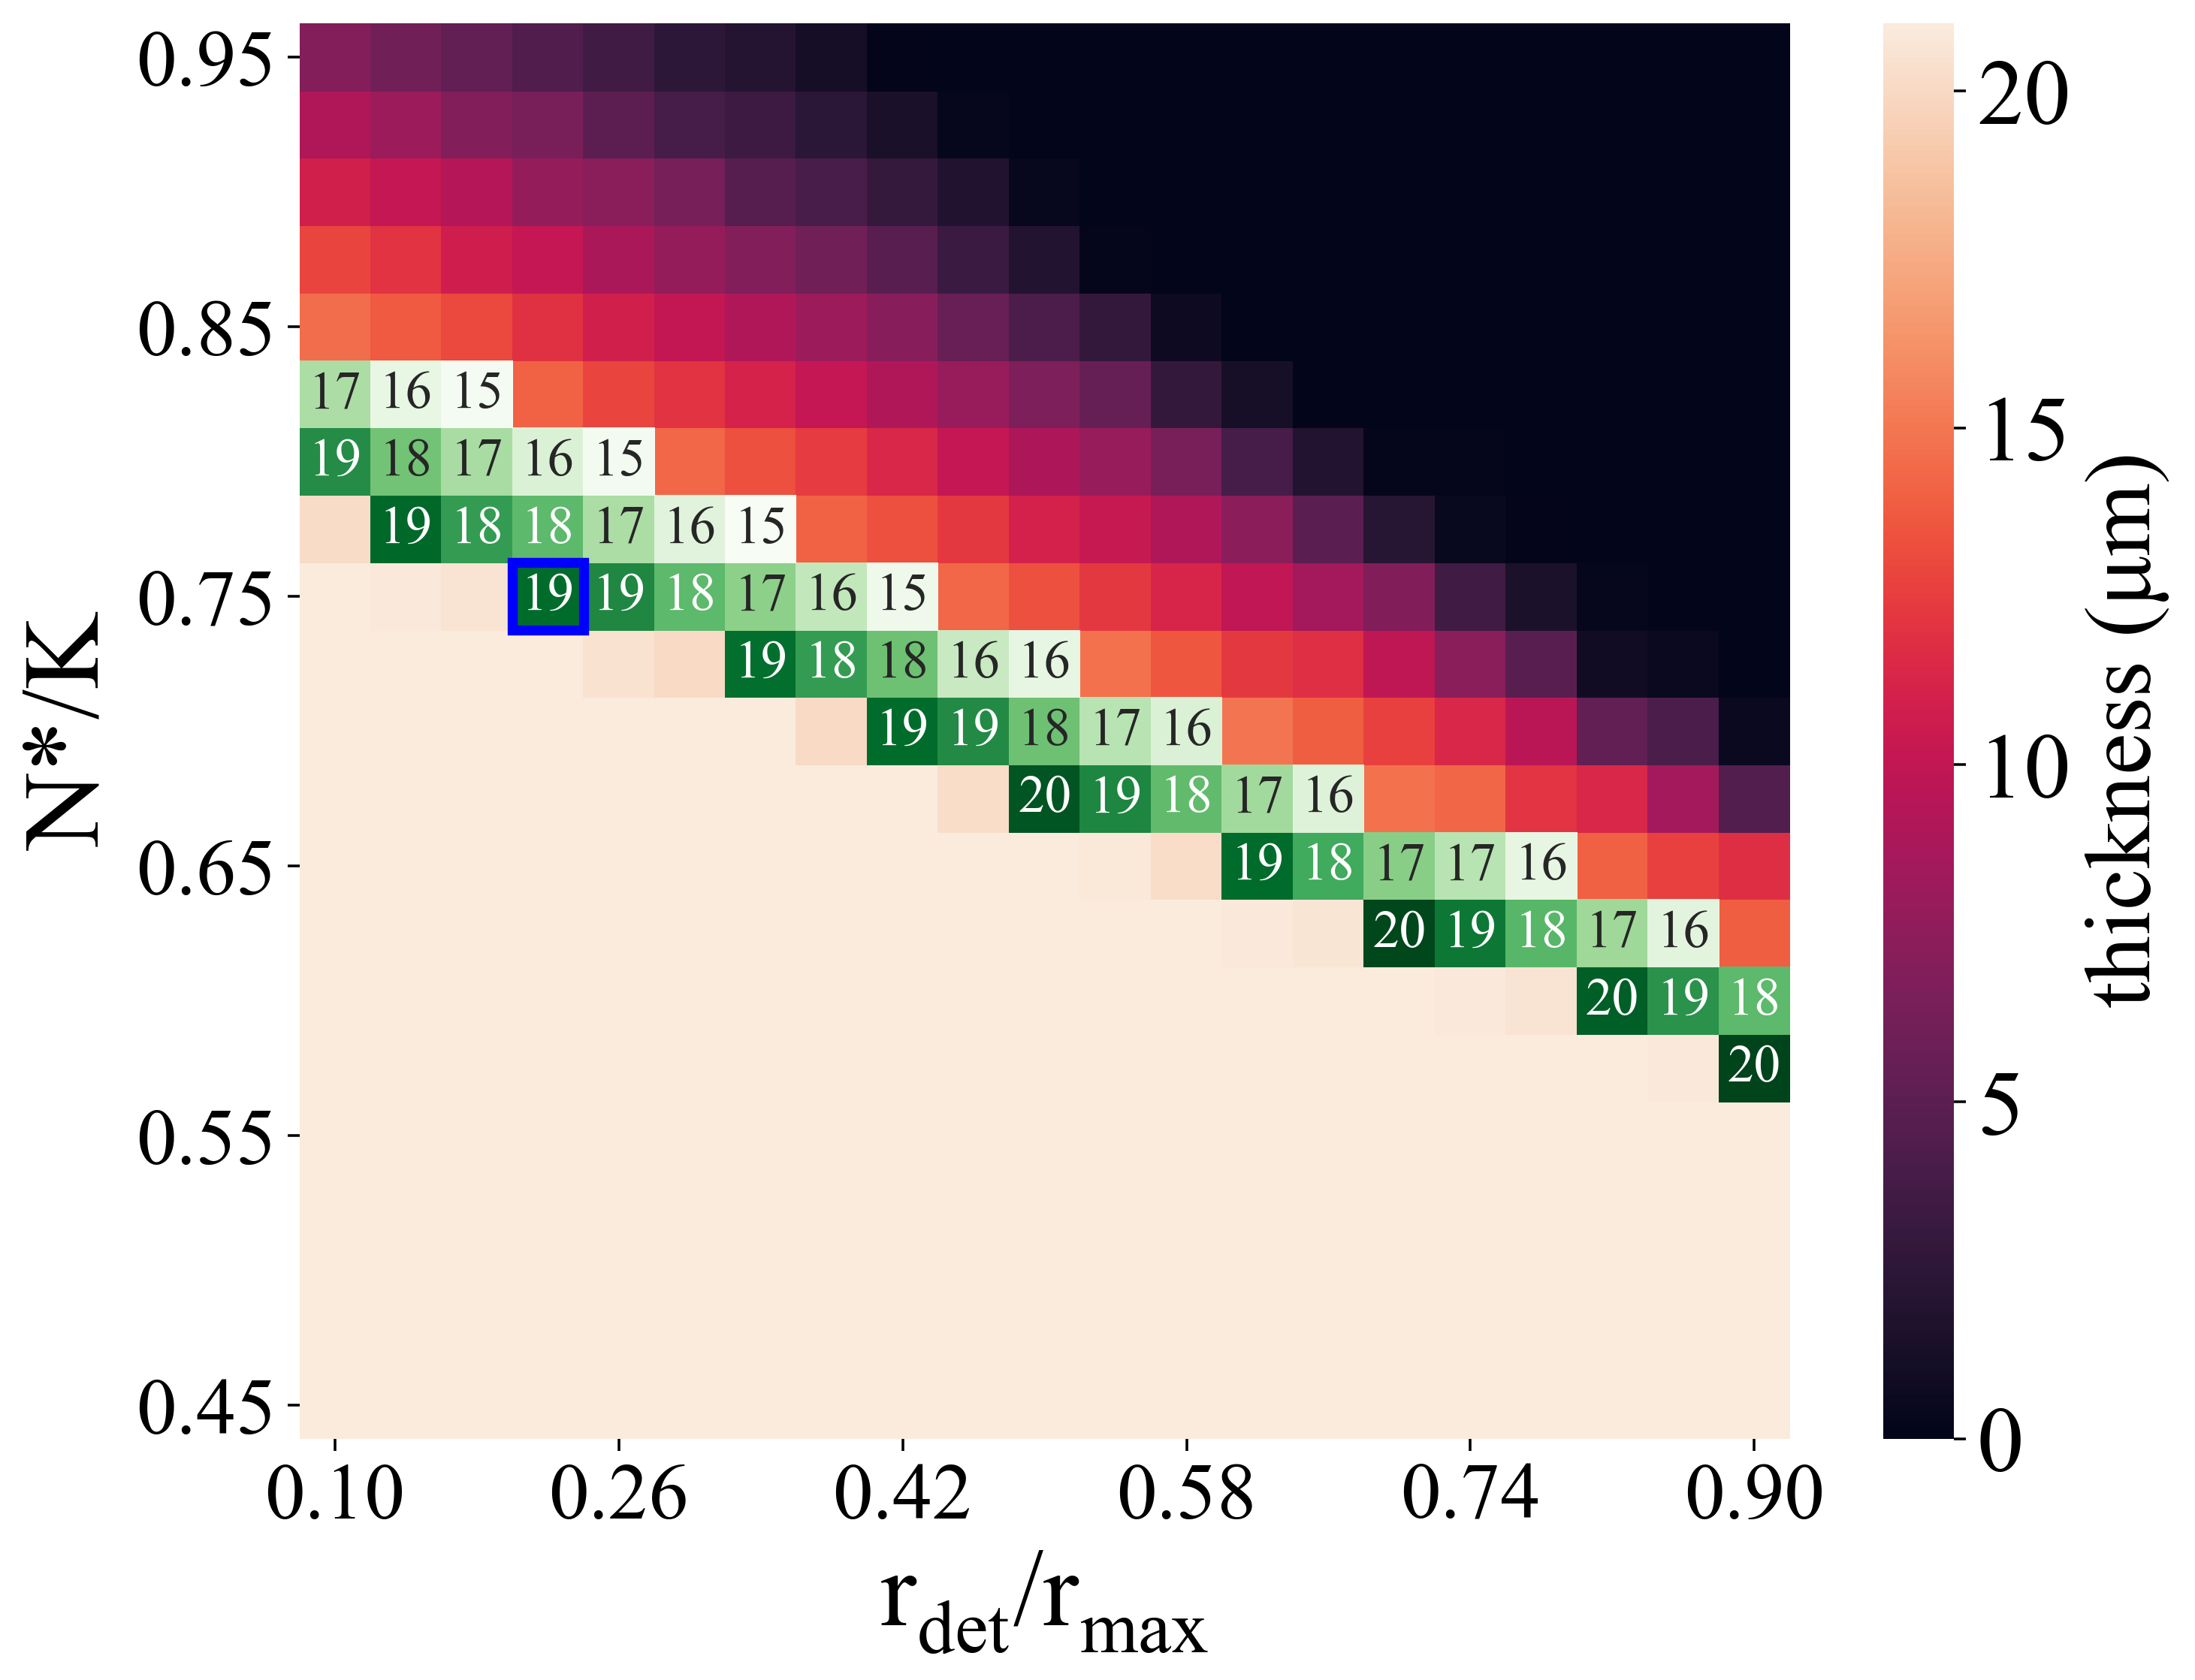

In [14]:
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(10, 7.8)
titleSize = 16
labelSize = 28
numbersize = 24
legendsize = 10
IDsize=12


#this mask will only plot values between 15 and 20
masko = (pivot < 15) | (pivot >= 20)

#phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False, xticklabels = 4, yticklabels=4)
ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True, xticklabels = 4, yticklabels=4, annot_kws={'size':16})
#ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.2f}".format(float(y)), labels_y))


# plot vertical line for the phase2/phase4 stuff from bftt
# ax2 = ax.twiny()
# ax2.set_xlim(0.078, 0.92)
# ax2.axvline(x=phase2_lim/max_gRate, linewidth=4, color='r') #red line is the region between phase 2 and 4 from the bftt paper
# ax2.scatter(0.42, 0.45)
# print(phase2_lim/max_gRate)

ax.add_patch(Rectangle((3, 12), 1, 1, fill=False, edgecolor='blue', lw=3)) # highlight parameter pair used in the simulations

ax.set_xlabel('$r_{det}/r_{max}$', fontsize=labelSize+4)
ax.set_ylabel('N*/K', fontsize=labelSize+4)
ax.xaxis.set_tick_params(labelsize=numbersize)
# ax2.xaxis.set_tick_params(labelsize=numbersize+5)
ax.yaxis.set_tick_params(labelsize=numbersize, rotation=0)

# ax2.set_xticks([phase2_lim_scaled])
# ax2.set_xticklabels(["$\\frac{r_{imm}}{g_{\max}K}$"])

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("thickness $(\\mu$m)", fontsize=labelSize)
cbar.ax.locator_params(nbins=6)

plt.savefig('plots/optimalNThreshAndRDet.pdf', bbox_inches='tight', dpi=330)
plt.show()

In [ ]:
pivot

In [ ]:
pivot.keys()


In [ ]:
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(10, 7.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12

pivot = param_data.pivot(index='N*', columns='det_ratio', values='thick_stDev')
#this mask will only plot values between 15 and 20
masko = (pivot < 15) | (pivot > 20)

#phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False)
#ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
#ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.3f}".format(float(y)), labels_y))

ax2 = ax.twiny()
ax2.set_xlim(0.078, 0.92)
ax2.axvline(x=phase2_lim/max_gRate, linewidth=4, color='r')
print(phase2_lim/max_gRate)

ax.set_xlabel('$r_{det}/g_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax2.xaxis.set_tick_params(labelsize=numbersize+5)
ax.yaxis.set_tick_params(labelsize=numbersize)

ax2.set_xticks([phase2_lim_scaled])
ax2.set_xticklabels(["$\\frac{r_{imm}}{g_{\max}K}$"])

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("$\sigma$(thickness) $(\\mu m)$", fontsize=labelSize)

plt.savefig('plots/optimalNThreshAndRDet.pdf')
plt.show()